In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import xarray as xa
import pandas as pd
import seaborn as sb

from astropy import units as u
from astropy.io import fits as pf
from astropy.visualization import simple_norm
from astropy.wcs import WCS

In [24]:
%run src/plotting.py

In [49]:
def as_to_sep(angsep):
    d = 51.8 * u.pc
    s = angsep * u.arcsec
    return (d * tan(s.to(u.radian))).to(u.AU).value

In [31]:
img_pharo = pf.getdata('data/other/TOI2266I-dc20210224-Brgamma.fits').astype('d')

dfp = pd.read_csv('data/other/TOI2266I-dc20210224-Brgamma_plot.tbl', skiprows=8, skipinitialspace=True)
dfj = pd.read_csv('data/other/TOI2266I-sg20210328-J_plot.tbl', skiprows=8, skipinitialspace=True)
dfk = pd.read_csv('data/other/TOI2266I-sg20210328-Ks_plot.tbl', skiprows=8, skipinitialspace=True)

dfs = dfj, dfk, dfp

for df in dfs:
    df.columns = [c.strip() for c in df.columns]
    
labels = ["ShARCS J", "ShARCS Ks", "PHARO Brgamma"]

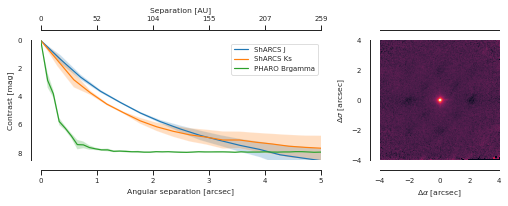

In [61]:
with sb.plotting_context('paper', font_scale=0.8):
    fig, axs = subplots(1, 2, figsize=(AAPW, 0.4*AAPW), gridspec_kw={'width_ratios':[0.7, 0.3]})
    ax, ax2 = axs
    ax3 = ax.twiny()
    for i,df in enumerate(dfs):
        ax.fill_between(df.arcsec, df.dmag-df.dmrms, df.dmag+df.dmrms, alpha=0.25)
        ax.plot(df.arcsec, df.dmag, label=labels[i])
    ax.legend(loc='best')
    setp(ax, ylim=(8.5, 0), xlim=(0, 5), xlabel='Angular separation [arcsec]', ylabel='Contrast [mag]')
    ax2.imshow(img_pharo, norm=simple_norm(img_pharo, stretch='log', min_percent=25, max_percent=99.99), extent=(-4, 4, -4, 4))
    setp(ax2, xlabel=r'$\Delta\alpha$ [arcsec]', ylabel=r'$\Delta\sigma$ [arcsec]', xticks=[-4, -2, 0, 2, 4])
    
    ax3.set_xlim(ax.get_xlim())
    ax3.set_xticks(ax.get_xticks())
    ax3.set_xticklabels([f"{s:.0f}" for s in as_to_sep(ax.get_xticks())])
    ax3.set_xlabel('Separation [AU]')
    
    sb.despine(fig, top=False, offset=10)
    fig.tight_layout()

fig.savefig('plots/TOI2266-hri.pdf')